<a href="https://colab.research.google.com/github/chaitalisaha06/CSI_Assignments/blob/main/Data_Visualization_on_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df=pd.read_csv("/content/drive/MyDrive/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 entries with null values in Age field and 687 null values in Cabin field

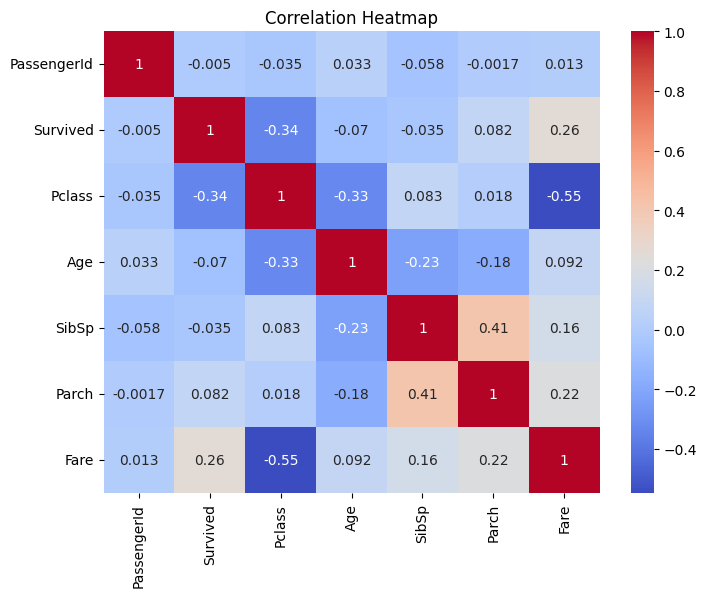

In [75]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Here in this graph, no features are  highly influenced by any other features, So, we need not to drop any feature.

<Axes: >

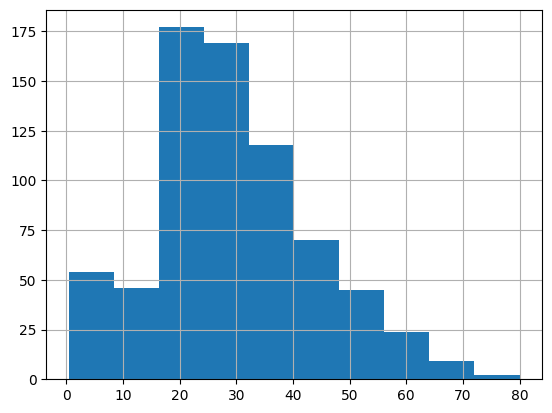

In [63]:
df['Age'].hist()

We see here that around 350 passengers were between 25 and 32 years of age, while there were less than 10 passengers over 72.

<Axes: xlabel='Survived'>

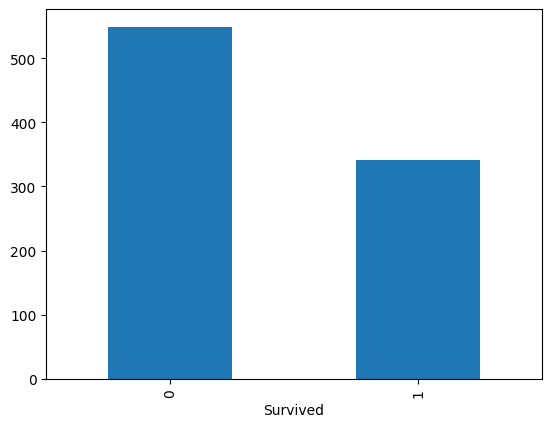

In [64]:
df['Survived'].value_counts().plot(kind='bar')

We see here that more than 500 passengers were died , while there were around 350 passengers who were survived.



<Axes: xlabel='Sex'>

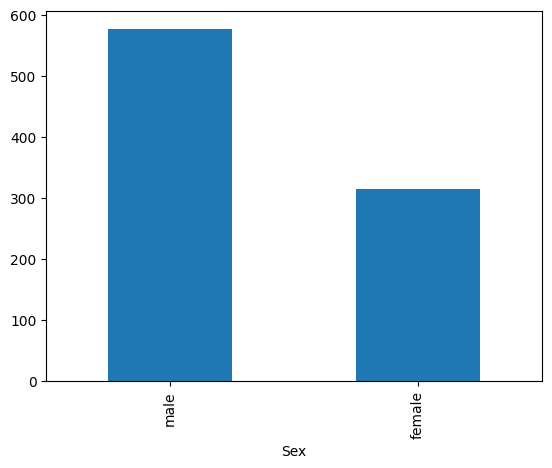

In [65]:
df['Sex'].value_counts().plot(kind='bar')

We see here that more than 500 passengers were male , while females were around 300.

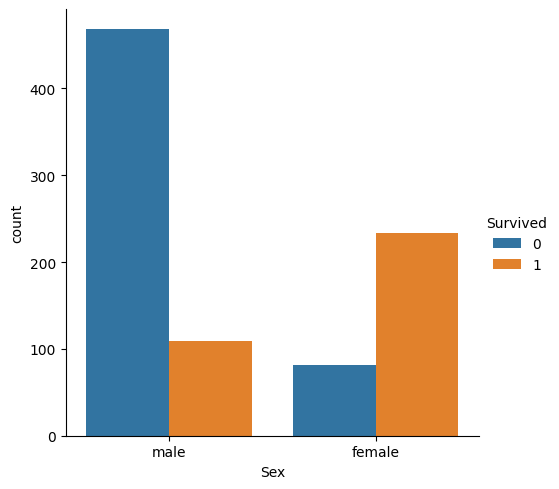

In [66]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)

In [67]:
survivors = df[df['Survived'] == 1]

# Count the number of survivors by sex
survivors_by_sex = survivors['Sex'].value_counts()

# Print the result
print(survivors_by_sex)

Sex
female    233
male      109
Name: count, dtype: int64


By observing the above graph, it can be approximated that the survival rate of men is around 20% among males travelled and that of women is around 78% among females travelled. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

<Axes: xlabel='Survived', ylabel='Pclass'>

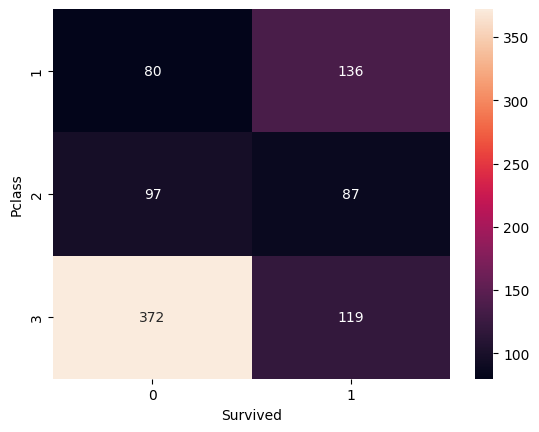

In [68]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

By observing the above HeatMap,we can determine that if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1(higher class) passengers have a higher survival chance compared to classes 2 and 3 and class 3(lower class) passengers had not survived. It implies that Pclass contributes a lot to a passenger’s survival rate.

In [69]:
# Fill missing Age values with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

<Axes: xlabel='Sex', ylabel='Age'>

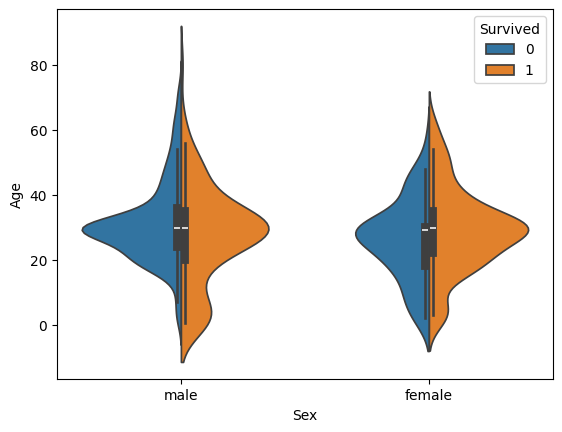

In [70]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = df, split = True)

here in this violinplot graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  

Good for children.
High for women and men in the age range 20-40.
Less for men as the age increases.

<Axes: xlabel='Fare_Range', ylabel='Survived'>

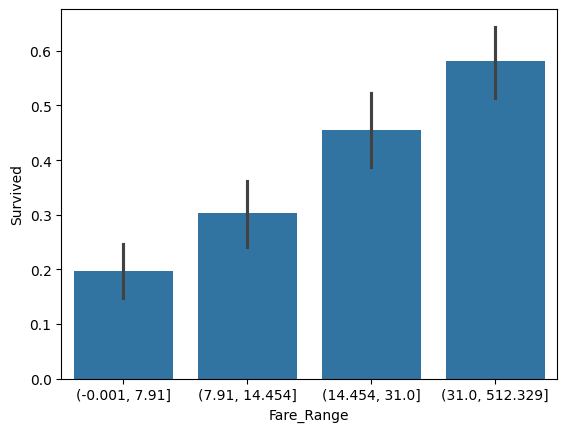

In [71]:
# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = df)

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is moreand highest is 31.0 to 512.

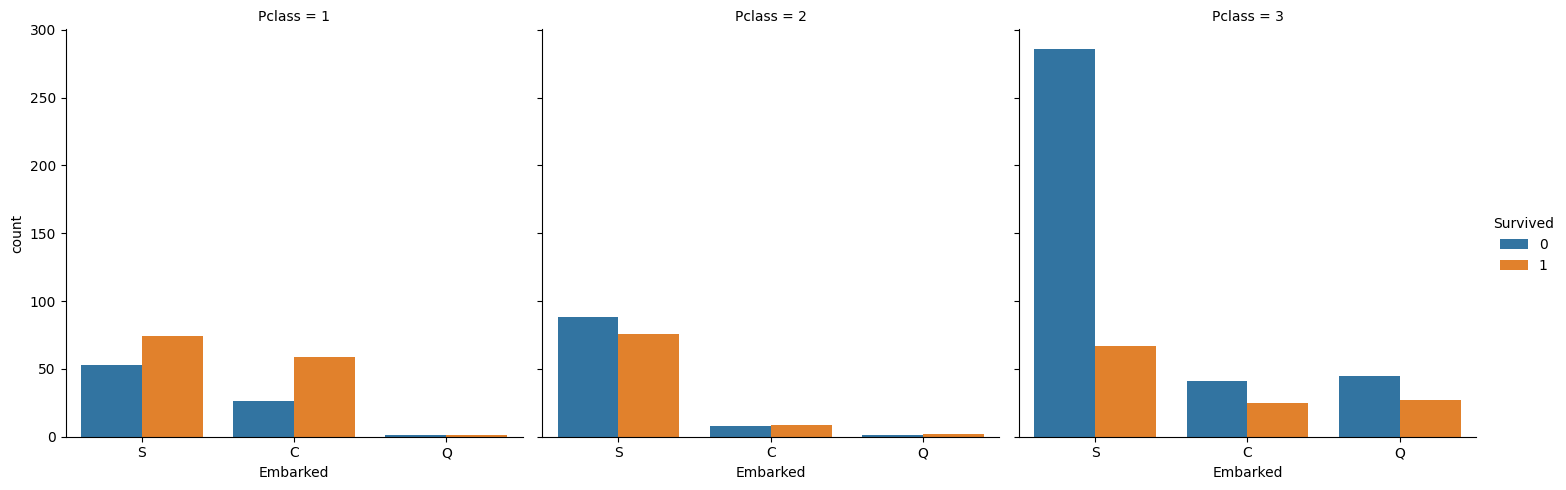

In [72]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df)

Majority of the passengers boarded from S. So, the missing values can be filled with S.Majority of class 3 passengers boarded from Q.